In [2]:
import pandas as pd
import numpy as  np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import linear, relu, sigmoid

In [3]:
#loading the data set
trainData=pd.read_csv("train.csv")

In [4]:
#testing whether the data is loaded perfectly
trainData.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#dimension of available data
print(trainData.shape)

(42000, 785)


In [6]:
#preprocessing 

#checking for null values
nullValues=trainData.isnull().sum()
print(nullValues)

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


In [7]:
#spilting xlabel and ylabel
x_train=trainData.iloc[:,1:]    #first column is label
y_train=trainData.iloc[:,0]     #remaining columns are pixel values

In [8]:
#defining the model
model=Sequential([
    Dense(units=64, activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=10, activation="linear")
])

In [9]:
#defining loss function and optimizer
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(0.001)
)

In [10]:
#training the model 
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 7.4502
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.5362
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.3343
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.2482
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.1983
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.1779
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.1613
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.1425
Epoch 9/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.1267
Epoch 10/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.1052


In [11]:
#first checking prediction on the training set
prediction=model.predict(x_train)  #this will give z values without any activation applied 

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


In [12]:
#we can simply predict the category/class as-
print(np.argmax(prediction[6]))
#answer should be 7

7


In [13]:
#Now we will be using this model to test on training data, we will generate the image using given pixel values 
#and along with the image we will display the predicted digit values

In [14]:
testData=pd.read_csv("test.csv")
testData_np = testData.to_numpy()

In [15]:

testData.shape

(28000, 784)

In [16]:
testPredictions=model.predict(testData)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


28000


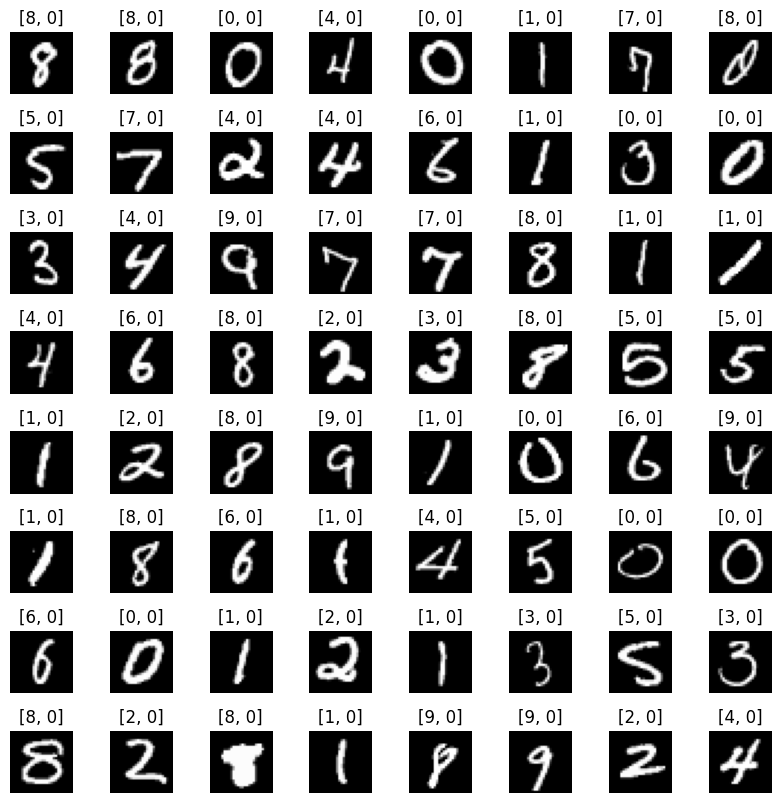

In [17]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = testData.shape
print(m)

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    pixel_data = testData.iloc[:, :].values
    random_index = np.random.randint(0, pixel_data.shape[0])
    x_random_reshaped = pixel_data[random_index].reshape((28, 28))

    # Display the image
    ax.imshow(x_random_reshaped, cmap='gray')
    # plt.show()
   
    
    # Display the label above the image
    ax.set_title([np.argmax(testPredictions[random_index]),0])
    ax.set_axis_off()